# Problema 3. Reemplazo de herramientas

Una empresa dispone de varias máquinas herramienta cuyas herramientas de corte se desgastan constantemente. Cuando esto ocurre, la máquina es inservible. En la actualidad el mantenimiento es correctivo reemplazándose una herramienta cuando falla. Dado que cada máquina dispone de una torre con cinco herramientas, se propone reemplazar toda la torre de herramientas (las cinco herramientas de golpe) cada vez que falle una, lo que debería reducir la frecuencia de desgaste de las herramientas. El tiempo necesario para el reemplazo de una herramienta es de una hora. Las cinco pueden reemplazarse en dos horas. El coste de una hora de máquina parada es de cien euros. Cada herramienta cuesta diez euros. La tabla siguiente recoge los datos de averías en el caso de sustituir una sola herramienta cada vez.

Horas entre averías si sustituye una herramienta 20 30 40 50 60 70 80
Probabilidad 0.05 0.15 0.15 0.20 0.20 0.15 0.10

Si las cinco herramientas se cambian cada vez que una falla, la distribución de probabilidad entre fallos es la siguiente:

Horas entre averías si sustituye una herramienta 30 40 50 60 70 80 90
Probabilidad 0.05 0.15 0.15 0.20 0.20 0.15 0.10

(a) Determine mediante simulación la mejor política de reemplazo de las herramien-
tas de corte.

### 1. Identifique las variables

Tenemos dos variables:

x1 = coste_total_correctivo que es el costo por reemplazar solo una herramienta

x2 = coste_total_preventivo que es el costo por reemplazar las 5 herramientas

### 2. Defina el modelo del sistema y los objetivos de la simulación

Para resolver el problema tenemos que obtener los costes totales obtenidos para determinar la mejor política de reemplazo de las herramientas de corte.

Si coste_total_correctivo < coste_total_preventivo entonces convendería en cuestiones económicas tomar la política 1.

Objetivo: Determinar el coste de cada política para hacer la comparativa.

In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [48]:
def reemplazar_una_herramienta(horas_transcurridas): 
    horas_totales = 0
    herramientas_reemplazadas = 0
    
    horas = [20, 30, 40, 50, 60, 70, 80]
    probabilidad = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10]

    while horas_totales < horas_transcurridas:
        tiempo_entre_averias = np.random.choice(horas, p=probabilidad)
        horas_totales += tiempo_entre_averias

        # Si una herramienta falla, se reemplaza
        if np.random.rand() < 0.2:
            horas_totales += 1
            herramientas_reemplazadas += 1

    coste_total_correctivo = herramientas_reemplazadas * 10 + (horas_totales / 2) * 100
    return coste_total_correctivo

En este caso, se simula un total de 10,000 horas de uso de las máquinas. Si una herramienta falla, se reemplaza y se suma una hora al tiempo total de mantenimiento. Al final del proceso, se calcula el coste total del mantenimiento correctivo.

In [49]:
def reemplazar_todo(horas_transcurridas):
    horas_totales = 0
    herramientas_reemplazadas = 0

    horas = [30, 40, 50, 60, 70, 80, 90]
    probabilidad = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10]
    
    while horas_totales < horas_transcurridas:
        tiempo_entre_averias = np.random.choice(horas, p=probabilidad)
        horas_totales += tiempo_entre_averias

        # Si una herramienta falla, se reemplaza toda la torre de herramientas
        if np.random.rand() < 0.2:
            horas_totales += 2
            herramientas_reemplazadas += 5

    coste_total_preventivo = herramientas_reemplazadas * 10 + (horas_totales / 2) * 100
    return coste_total_preventivo

En este caso, se simula el mismo tiempo total de uso de las máquinas y se reemplaza toda la torre de herramientas cada vez que falla una herramienta. Al final del proceso, se calcula el coste total del mantenimiento preventivo.

In [53]:
horas_transcurridas = int(input("Ingrese el número de horas simuladas del uso de las máquinas: "))
politica_1 = reemplazar_una_herramienta(horas_transcurridas)
politica_2 = reemplazar_todo(horas_transcurridas)

Ingrese el número de horas simuladas del uso de las máquinas: 1000


In [55]:
if politica_1 < politica_2:
    print("La política 1 es la mejor opción.")
else:
    print("La política 2 es la mejor opción.")


La política 1 es la mejor opción.


### 3. Diseñe el experimento

Para estimar la probabilidad de elegir la politica 1, ejecutamos n veces la función anterior y calculamos de manera acumulativa la probabilidad de esa politica.

In [201]:
def politicas():
    i = 0
    politica = 0
    
    politica_1 = reemplazar_una_herramienta(1000)
    politica_2 = reemplazar_todo(1000)
        
    if politica_1 < politica_2:
        politica = 1
    else: 
        politica = 0
    return politica

Si la politica mejor es la politica 1, nos regresará un valor de 1, caso contrario de 0.

In [208]:
def prob_politicas(n):                    
    prob = []                       
    politic = 0                        
    for i in range(n):              
        politic += politicas()
        prob.append(politic/(i+1))
    return prob

Obtenemos la lista de probabilidades con los valores de probabilidades estimadas al contar las veces que la politica 1 es la mejor y dividir entre las veces que se ha repetido la observación mientras aumenta el número de iteraciones.

In [209]:
x = prob_politicas(100)

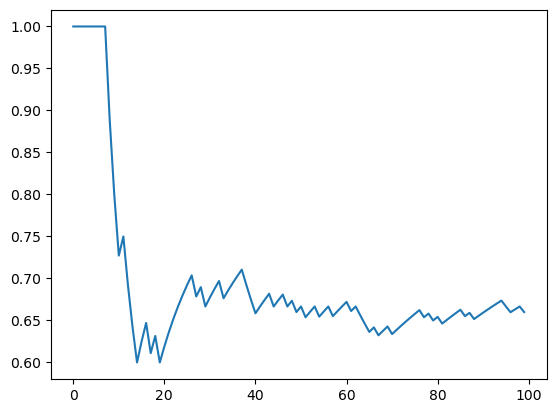

In [210]:
plt.plot(x) 

### 4. Repita el experimento n veces

In [211]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_politicas(500)
        lista.append(np.mean(s))
    return lista

In [212]:
Y=modelo(100)

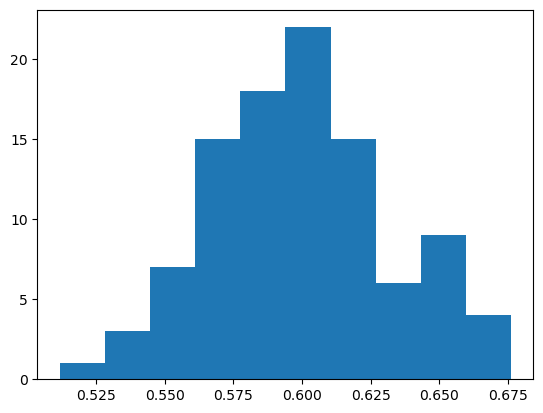

In [213]:
plt.hist(Y)
plt.show()

In [215]:
print(np.mean(Y), np.std(Y))

0.5994682801078067 0.031550984806158124


### 5.  Hallamos el intervalo de confianza

In [214]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.5907227933064638, 0.6082137669091496)